In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [2]:
def game_winner(p, player1= 'player A', player2= 'player B'):    # p being probability of player1 winning the point
    winner_not_determined= True
    player_a_points=0
    player_b_points=0
    while winner_not_determined:
        if random.random() > p:
            player_b_points +=1
        else:
            player_a_points += 1

        check= (player_a_points>=4) | (player_b_points >= 4)

        if check:
            W = max(player_a_points , player_b_points)
            L = min(player_a_points , player_b_points)
            if (W==4) & (L < 4) :
                winner_not_determined= False
            elif (W - L) == 2:
                winner_not_determined= False

    if W == player_a_points :
        return player1
    elif W == player_b_points:
        return player2

In [93]:
game_winner(.1,1,2)

2

In [20]:
def set_winner(p1,p2,serving_first,player1= 'player A', player2= 'player B'):
    #p1 is probability of winning a point for player1 when serving
    #p2 is probability of winning a point for player1 when receiving
    #serving_first=1 if player1 is seving first, 2 if player2 
    winner_not_determined= True
    player_a_games=0
    player_b_games=0
    tie_break= False
    game_number=1
    if serving_first==1:  
        while winner_not_determined:
            if game_number%2 != 0:
                p=p1
            else:
                p=p2
            if game_winner(p, player1, player2)== player1 :
                player_a_games +=1
            else:
                player_b_games +=1
            game_number+=1
            check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)

                if (W==6) & (L< 5):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
                else:
                    tie_break= True
                    winner_not_determined= False
        if tie_break== False:
            if W == player_a_games:
                return player1
            elif W == player_b_games:
                return player2
        else:
            return tie_breaker(p1,p2,serving_first,player1, player2)
               
    elif serving_first==2:  
        while winner_not_determined:
            if game_number%2 != 0:
                p=p2
            else:
                p=p1
            if game_winner(p, player1, player2)== player1 :
                player_a_games +=1
            else:
                player_b_games +=1
            game_number+=1
            check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)

                if (W==6) & (L< 5):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
                else:
                    tie_break= True
                    winner_not_determined= False

        if tie_break== False:
            if W == player_a_games:
                return player1
            elif W == player_b_games:
                return player2

        else:
            return tie_breaker(p1,p2,serving_first,player1, player2)

In [21]:
def tie_breaker(p1,p2,serving_first,player1= 'player A', player2= 'player B', thre=7):
    winner_not_determined= True
    player_a_games=0
    player_b_games=0
    point_number=1
    if serving_first==1:
        while winner_not_determined:
            if int(point_number/2)%2 == 0:
                p=p1
            else:
                p=p2
            if random.random() < p:
                player_a_games +=1
            else:
                player_b_games +=1
            point_number +=1
            check= (player_a_games >= thre) | (player_b_games >= thre) 
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)
                if (W==thre) & (L< thre-1):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
        if W == player_a_games:
            return player1
        elif W == player_b_games:
            return player2 

    elif serving_first==2:
        while winner_not_determined:
            if int(point_number/2)%2 == 0:
                p=p2
            else:
                p=p1
            if random.random() < p:
                player_a_games +=1
            else:
                player_b_games +=1
            point_number +=1
            check= (player_a_games >= thre) | (player_b_games >= thre) 
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)
                if (W==thre) & (L< thre-1):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
        if W == player_a_games:
            return player1
        elif W == player_b_games:
            return player2 

In [22]:
sum(np.array([set_winner(.53,.49,1)=='player A' for i in range(1000000)]))/1000000 

0.562831

In [23]:
def tie_breaker_set_winner(p1,p2,serving_first,player1= 'player A', player2= 'player B'):
    #p1 is probability of winning a point for player1 when serving
    #p2 is probability of winning a point for player1 when receiving
    #serving_first=1 if player1 is seving first, 2 if player2 
    winner_not_determined= True
    player_a_games=0
    player_b_games=0
    game_number=1
    if serving_first==1:  
        while winner_not_determined:
            if game_number%2 != 0:
                p=p1
            else:
                p=p2
            if game_winner(p, player1, player2)== player1 :
                player_a_games +=1
            else:
                player_b_games +=1
            game_number+=1
            check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)

                if (W==6) & (L< 5):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
        
        if W == player_a_games:
            return player1
        elif W == player_b_games:
            return player2
        
               
    elif serving_first==2:  
        while winner_not_determined:
            if game_number%2 != 0:
                p=p2
            else:
                p=p1
            if game_winner(p, player1, player2)== player1 :
                player_a_games +=1
            else:
                player_b_games +=1
            game_number+=1
            check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
            if check:
                W= max(player_a_games,player_b_games)
                L= min(player_a_games,player_b_games)

                if (W==6) & (L< 5):
                    winner_not_determined= False
                elif (W-L) == 2:
                    winner_not_determined= False
                elif (W-L) == 1:
                    winner_not_determined= True
        
        if W == player_a_games:
            return player1
        elif W == player_b_games:
            return player2

In [33]:
def match_winner(p1,p2 ,player1= 'player A', player2= 'player B', tog='m'):
    winner_not_determined= True
    player_a_sets=0
    player_b_sets=0
    tie_breaker= False
    l=[1,2]
    toss= random.choice(l)
    not_toss= l[l!=toss]
    set_number=1
    
    if tog=='m':   # Singles
        while winner_not_determined:
            if set_number %2 !=0:
                serve=toss
            else:
                serve= not_toss           
            if set_winner(p1,p2,serve,player1,player2)== player1:
                player_a_sets +=1
            else:
                player_b_sets +=1
            check = (player_a_sets >= 2) | (player_b_sets >= 2)
            set_number +=1
            if check:
                W = max(player_a_sets,player_b_sets)
                L = min(player_a_sets,player_b_sets)

                if (W==3):
                    winner_not_determined= False
                elif (W == L):
                    tie_breaker= True
                    winner_not_determined= False

        if tie_breaker:
            return tie_breaker_set_winner(p1,p2,toss,player1, player2)

        else:
            if W == player_a_sets:
                return player1

            elif W == player_b_sets:
                return player2

    else:   # Singles
        while winner_not_determined:
            if set_number %2 !=0:
                serve=toss
            else:
                serve= not_toss           
            if set_winner(p1,p2,serve,player1,player2)== player1:
                player_a_sets +=1
            else:
                player_b_sets +=1

            check = (player_a_sets >= 1) | (player_b_sets >= 1)
            set_number +=1

            if check:
                W = max(player_a_sets,player_b_sets)
                L = min(player_a_sets,player_b_sets)

                if (W==2):
                    winner_not_determined= False
                elif (W -L) == 2:
                    tie_breaker= True
                    winner_not_determined= False

        if tie_breaker:
            return tie_breaker_set_winner(p1,p2,toss,player1, player2)

        else:
            if W == player_a_sets:
                return player1

            elif W == player_b_sets:
                return player2

In [34]:
sum(np.array([match_winner(.53,.51, tog='m')=='player A' for i in range(1000000)]))/1000000   # 72% of matches are won by better player male

0.723979

In [35]:
sum(np.array([match_winner(.53,.51, tog='f')=='player A' for i in range(1000000)]))/1000000 

0.68247

In [36]:
#TOURNAMENT

In [90]:
mean=[50,50]
std=[[100,80],[80,100]]
x, y = np.random.multivariate_normal(mean, std, 5000).T
import math
S_S= x
R_S= y
Scores= [math.sqrt(S_S[i]**2 + R_S[i]**2) for i in range(len(S_S))]
players_dataframe=pd.DataFrame(data= {'Scores': Scores, 'Serve_Score': S_S, 'Return_Score': R_S})
players_dataframe=players_dataframe.sort_values('Scores',ascending=False)
players_dataframe= players_dataframe.iloc[0:64]
players_dataframe.reset_index(inplace=True)
players_dataframe.drop('index', inplace= True, axis=1)
players=[i for i in range(1,65)]
players_dataframe['Players']=players

In [91]:
def pairs(lis):
    l= lis.copy()
    k=[]
    while len(l) > 0:
        pair=[l[0],l[-1]]
        l= l[1:-1]
        k.append(pair)
    return k

In [98]:
def tournament_winner(players_dataframe, maleorfemale='m'):
    list1= players_dataframe.Players.tolist()
    breaklist=[2**i for i in range(1,7)]
    for i,v in enumerate(list1):
        if v in breaklist:
            list1.insert(i+1,'b')   
    big_chunck=[]
    small_chunck=[]
    for v in list1:
        if v != 'b':
            small_chunck.append(v)
        else:
            big_chunck.append(small_chunck)
            small_chunck=[]        
    L=[]
    R=[]
    for lists in big_chunck:
        n= len(lists)
        a= int(n/2)
        if a>1:
            subset_L= random.sample(lists, a)
            subset_R= list(set(lists) - set(subset_L))
            L = L + subset_L
            R = R + subset_R   
        else:
            subset_L= [random.choice(lists)]
            subset_R= list(set(lists) - set(subset_L))
            L = L + subset_L
            R = R + subset_R     
    L.sort()
    R.sort()    
    L_matchup= pairs(L)
    R_matchup= pairs(R)
    matches = L_matchup + R_matchup  
    prob1=[]
    prob2=[]
    for match in matches:
        s_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Serve_Score.iloc[0]
        s_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Serve_Score.iloc[0]
        r_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Return_Score.iloc[0]
        r_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Return_Score.iloc[0]
        p_s= s_score1 ** 2/ (s_score1 ** 2 + s_score2 ** 2)
        p_r= r_score1 ** 2/ (r_score1 ** 2 + r_score2 ** 2)
        p1= max(p_s,1-p_s)
        p2= max(p_r, 1-p_r)
        prob1.append(p1)
        prob2.append(p2)
    winner=[]
    for i,p1 in enumerate(prob1):
        a= match_winner(p1, prob2[i], min(matches[i]), max(matches[i]), maleorfemale)
        winner.append(a)
    match_dataframe=pd.DataFrame(data={'matches': matches, 'winner': winner }) 
    #print(match_dataframe)
    while match_dataframe.shape[0] != 2:
        n= int(match_dataframe.shape[0]/2)
        L= match_dataframe.winner[0:n].tolist()
        R= match_dataframe.winner[n:].tolist()
        l_matches= pairs(L)
        r_matches= pairs(R)
        matches= l_matches + r_matches
        prob1=[]
        prob2=[]
        for match in matches:
            s_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Serve_Score.iloc[0]
            s_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Serve_Score.iloc[0]
            r_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Return_Score.iloc[0]
            r_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Return_Score.iloc[0]
            p_s= s_score1 ** 2/ (s_score1 ** 2 + s_score2 ** 2)
            p_r= r_score1 ** 2/ (r_score1 ** 2 + r_score2 ** 2)
            p1= max(p_s,1-p_s)
            p2= max(p_r, 1-p_r)
            prob1.append(p1)
            prob2.append(p2)
        winner=[]
        for i,p1 in enumerate(prob1):
            a= match_winner(p1, prob2[i], min(matches[i]), max(matches[i]), maleorfemale)
            winner.append(a)
        match_dataframe=pd.DataFrame(data={'matches': matches, 'winner': winner })
        #print(match_dataframe)
    L= match_dataframe.winner[0:2].tolist()
    R= match_dataframe.winner[2:].tolist()
    l_matches= pairs(L)
    r_matches= pairs(R)
    matches= l_matches + r_matches
    prob1=[]
    prob2=[]
    for match in matches:
        s_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Serve_Score.iloc[0]
        s_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Serve_Score.iloc[0]
        r_score1= players_dataframe.loc[players_dataframe.Players == match[0]].Return_Score.iloc[0]
        r_score2= players_dataframe.loc[players_dataframe.Players == match[1]].Return_Score.iloc[0]
        p_s= s_score1 ** 2/ (s_score1 ** 2 + s_score2 ** 2)
        p_r= r_score1 ** 2/ (r_score1 ** 2 + r_score2 ** 2)
        p1= max(p_s,1-p_s)
        p2= max(p_r, 1-p_r)
        prob1.append(p1)
        prob2.append(p2)
    winner=[]
    for i,p in enumerate(prob1):
        a= match_winner(p,prob2[i], min(matches[i]), max(matches[i]), 'm')
        winner.append(a)
    return winner[0]

In [100]:
tournament_winner(players_dataframe,'m')

1

In [101]:
male_winners= []
for i in range(1000):
    male_winners.append(tournament_winner(players_dataframe,'m'))
    if i%50 == 0:
        print(i)
female_winners= []
for i in range(1000):
    female_winners.append(tournament_winner(players_dataframe,'f'))
    if i%50 == 0:
        print(i)


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [102]:
male_winners= np.array(male_winners)
female_winners= np.array(female_winners)

In [104]:
m_w=pd.Series(male_winners).value_counts()
f_w=pd.Series(female_winners).value_counts()

In [105]:
m_w_four_winners= np.array(m_w.tolist())[0:4].sum()
f_w_four_winners= np.array(f_w.tolist())[0:4].sum()

In [106]:
stability_in_mens_game = (m_w_four_winners - f_w_four_winners)/1000

In [107]:
stability_in_mens_game

0.045

In [108]:
stability=[]
for k in range(100):
    male_winners= []
    for i in range(100):
        male_winners.append(tournament_winner(players_dataframe,'m'))
        if i%50 == 0:
            print(i)
    female_winners= []
    for i in range(100):
        female_winners.append(tournament_winner(players_dataframe,'f'))
        if i%50 == 0:
            print(i)
    male_winners= np.array(male_winners)
    female_winners= np.array(female_winners)
    m_w=pd.Series(male_winners).value_counts()
    f_w=pd.Series(female_winners).value_counts()
    m_w_four_winners= np.array(m_w.tolist())[0:4].sum()
    if k%10 == 0:
        print('{} done'.format(k))
    f_w_four_winners= np.array(f_w.tolist())[0:4].sum()
    stability_in_mens_game = (m_w_four_winners - f_w_four_winners)/100
    stability.append(stability_in_mens_game)

0
50
0
50
0 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
10 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
20 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
30 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
40 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
50 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
60 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
70 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
80 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
90 done
0
50
0
50
0

<AxesSubplot:>

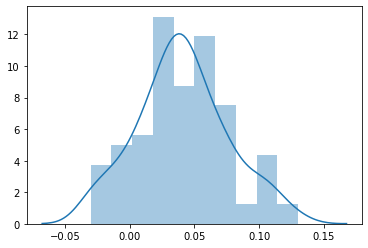

In [109]:
sns.distplot(stability)

In [110]:
from scipy.stats import norm

mu, std = norm.fit(stability)

u_l = mu + 1.96* std
l_l = mu - 1.96* std

In [111]:
l_l

-0.02810995869785128

In [112]:
z= (0-mu)/std
import scipy
p_value = 1- scipy.special.ndtr(z)
p_value

0.8768348596871516

In [113]:
import dill
dill.dump_session('updated_tennis.db')

In [114]:
#dill.load_session('updated_tennis.db')